In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Read the CSV file
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6


In [3]:
# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])

In [4]:
fuel_econ.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic


In [5]:
print(fuel_econ.shape)

(3929, 21)


In [6]:
#randomly choose subset of the data
#NOT true random
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace=True)
fuel_econ_subset = fuel_econ.loc[sample]

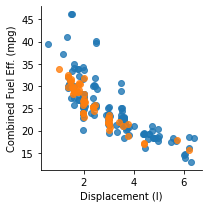

In [7]:
# first two are numeric parameters
# Third parameter is categorical parameter
g = sb.FacetGrid(data=fuel_econ_subset, hue='trans_type');
g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

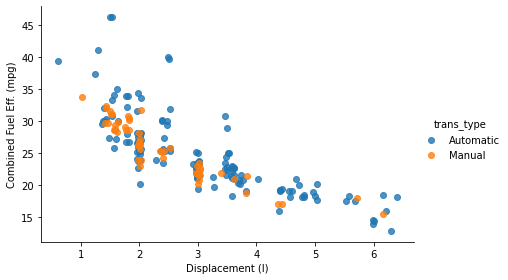

In [9]:
# first two are numeric parameters
# Third parameter is categorical parameter
g = sb.FacetGrid(data=fuel_econ_subset, hue='trans_type',
                hue_order=['Automatic', 'Manual'],
                height=4, aspect=1.5);
g = g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False);
g.add_legend()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

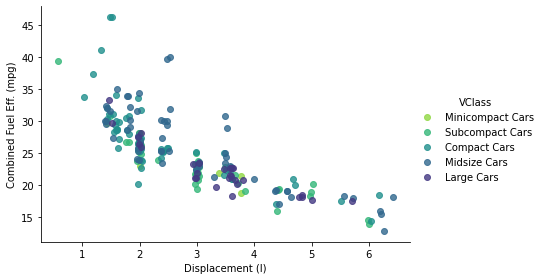

In [11]:
# first two are numeric parameters
# Third parameter is categorical (VClass)
g = sb.FacetGrid(data=fuel_econ_subset, hue='VClass',
                height=4, aspect=1.5,
                palette = 'viridis_r');
g = g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False);
g.add_legend()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

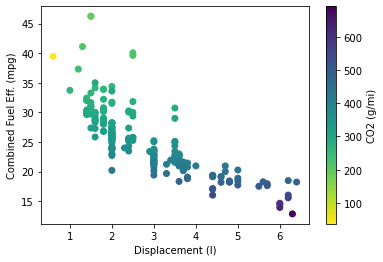

In [15]:
# first two are numeric parameters
# third parameter is numeric (CO2)
# Use viridis_r
plt.scatter(data=fuel_econ_subset, x='displ', y='comb', c='co2', cmap = 'viridis_r')
plt.colorbar(label = 'CO2 (g/mi)')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

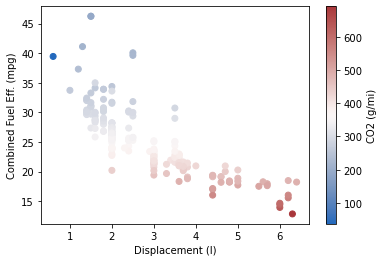

In [20]:
# first two are numeric parameters
# third parameter is numeric (CO2)
# Use vlag for Diverging Palette --> As an example below
# need to use min and max --> NOT shown in this one
plt.scatter(data=fuel_econ_subset, x='displ', y='comb', c='co2', cmap = 'vlag')
plt.colorbar(label = 'CO2 (g/mi)')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

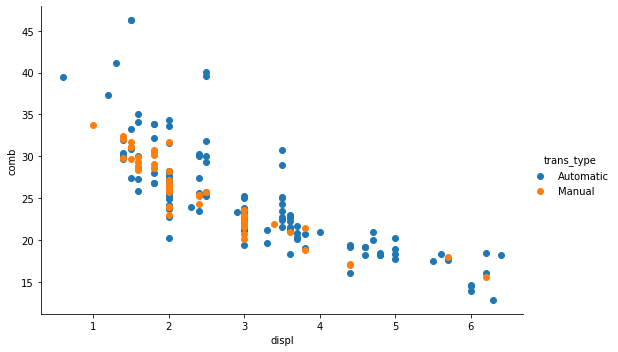

In [19]:
# first two are numeric parameters
# Third parameter is categorical parameter
g = sb.FacetGrid(data=fuel_econ_subset, hue='trans_type', height=5, aspect=1.5)
g.map(plt.scatter, 'displ', 'comb')
g.add_legend()